In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('TrafficTwoMonth.csv')
data.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [2]:
# Combine Date and Time into a single datetime column
# Explicitly specifying the format for date and time
try:
    data['timestamp'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'], format='%d %H:%M:%S %p')
except Exception as e:
    print("Error converting to datetime:", e)

# Feature engineering: Extracting date, hour, day of the week
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek

# Calculate total vehicle count
data['Total'] = data['CarCount'] + data['BikeCount'] + data['BusCount'] + data['TruckCount']

# Add traffic situation based on total vehicle count
conditions = [
    (data['Total'] >= 100),  # Arbitrary threshold for heavy traffic
    (data['Total'] >= 75) & (data['Total'] < 100),
    (data['Total'] >= 50) & (data['Total'] < 75),
    (data['Total'] < 50)
]
choices = [1, 2, 3, 4]
data['TrafficSituation'] = np.select(conditions, choices)

# Display the first few rows
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,timestamp,hour,day_of_week,TrafficSituation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal,1900-01-10 12:00:00,12,2,4
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal,1900-01-10 12:15:00,12,2,3
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal,1900-01-10 12:30:00,12,2,4
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal,1900-01-10 12:45:00,12,2,3
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal,1900-01-10 01:00:00,1,2,4


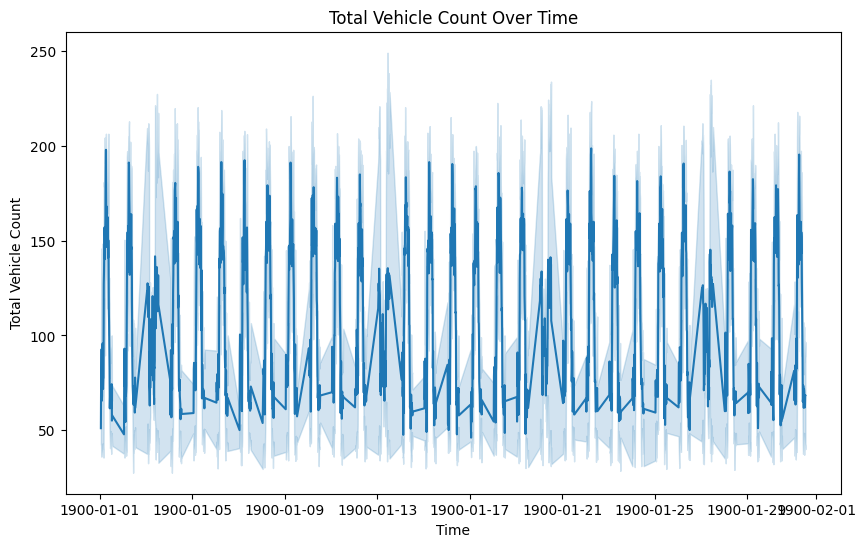

In [3]:
# Traffic volume over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='timestamp', y='Total', data=data)
plt.title('Total Vehicle Count Over Time')
plt.xlabel('Time')
plt.ylabel('Total Vehicle Count')
plt.show()

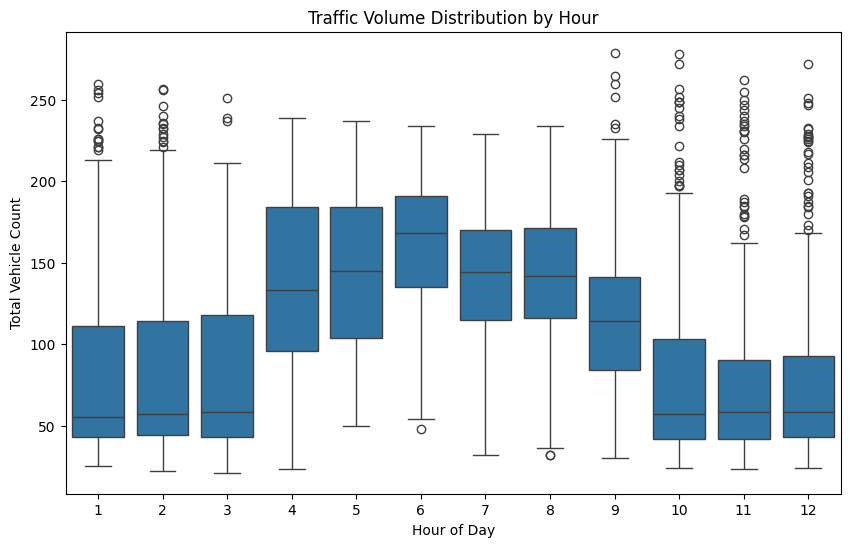

In [4]:
# Traffic Volume Distribution by Hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='Total', data=data)
plt.title('Traffic Volume Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Vehicle Count')
plt.show()

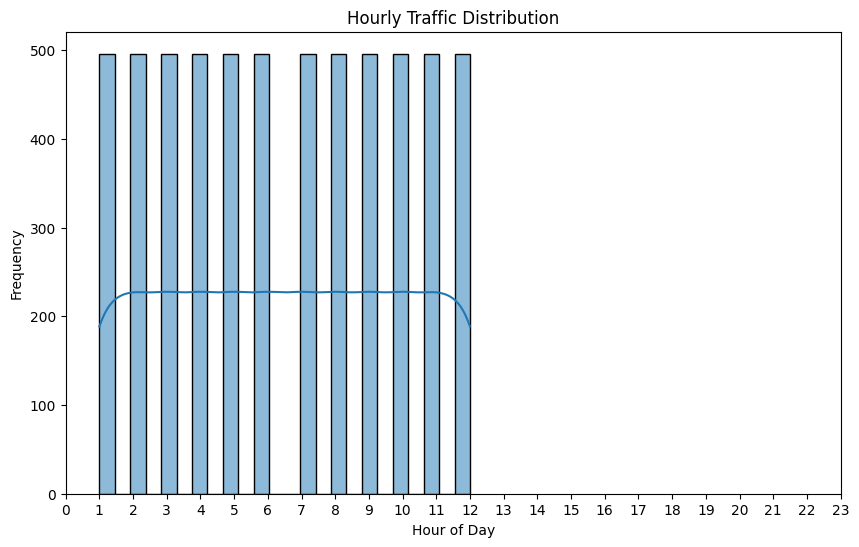

In [5]:
# Hourly traffic distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='hour', bins=24, kde=True)
plt.title('Hourly Traffic Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.show()

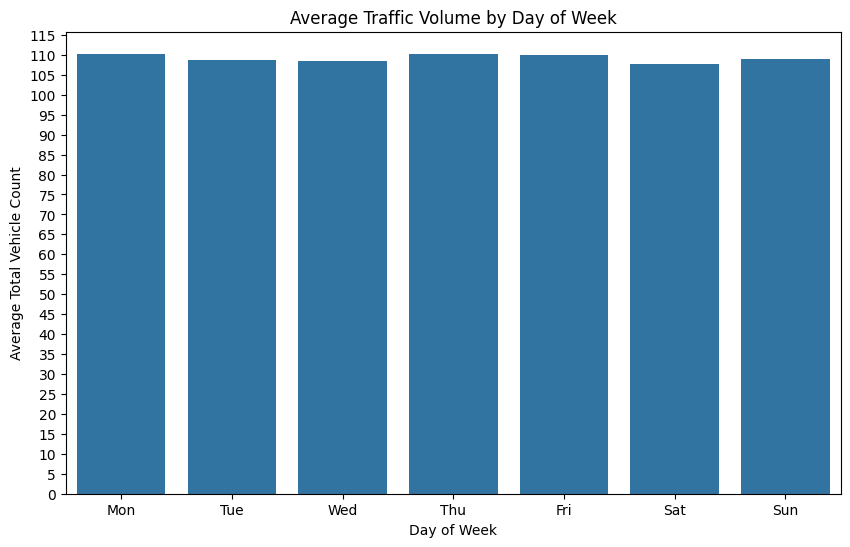

In [6]:
# Average traffic volume by day of week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='Total', data=data, estimator=np.mean, errorbar=None)
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Total Vehicle Count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(np.arange(0,120, 5))
plt.show()

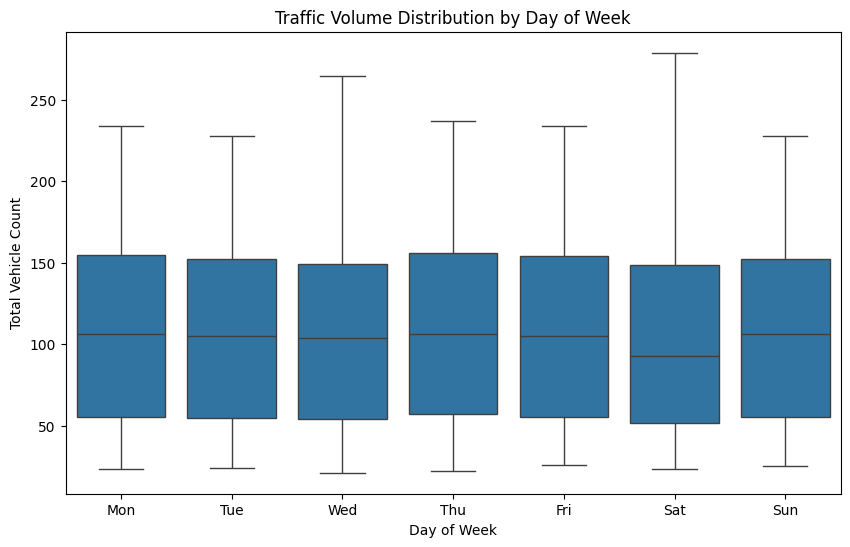

In [7]:
# Boxplot of traffic volume by day of week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='Total', data=data)
plt.title('Traffic Volume Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Vehicle Count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

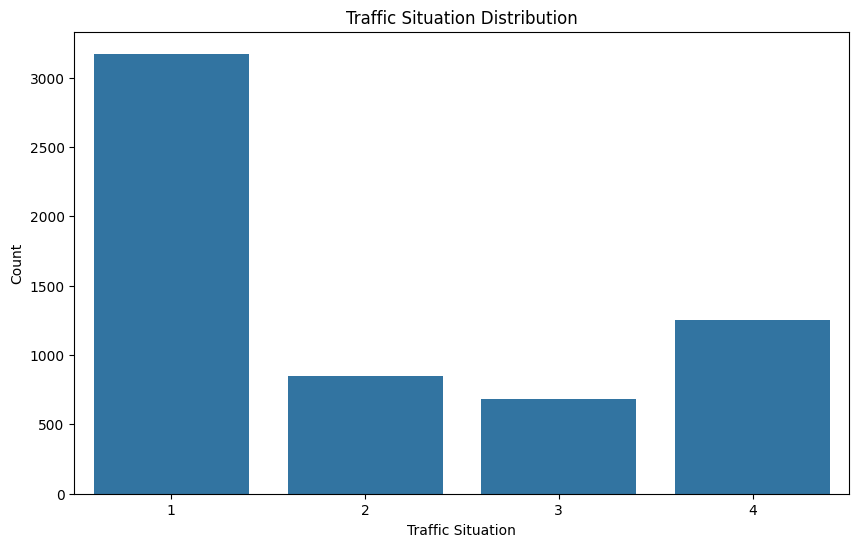

In [8]:
# Traffic Situation Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='TrafficSituation', data=data)
plt.title('Traffic Situation Distribution')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

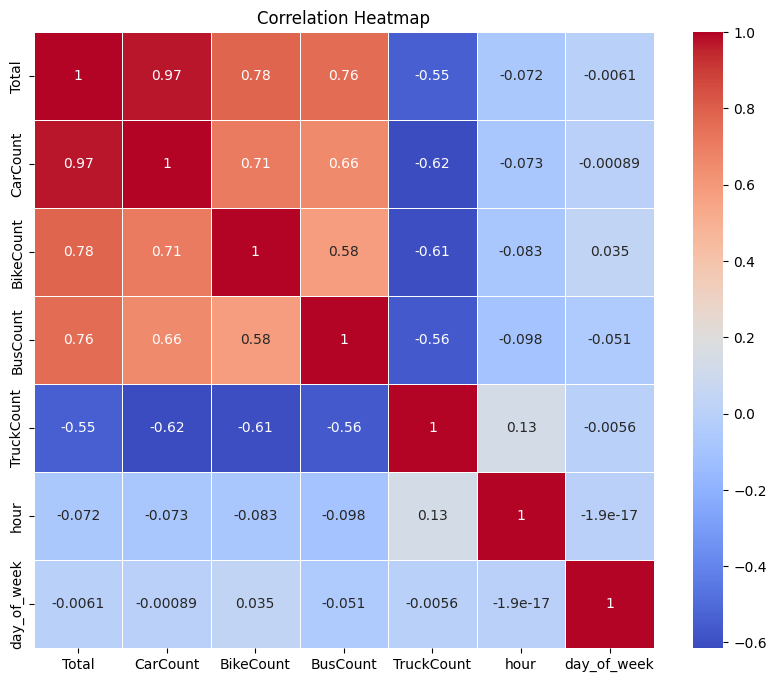

In [9]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data[['Total', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'hour', 'day_of_week']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# Lagged features can help you capture the patterns, trends, and seasonality in your time series data, as well as the effects of external factors or events. 
# Lagged features can also be used to create autoregressive models, which are models that use past values of the target variable to predict future values.
# So basically what shift does it shifts the elements by a value given with the time stamp 
# Traffic volume lag features
for lag in range(1, 4):
    data[f'Total_lag_{lag}'] = data['Total'].shift(lag)

# Drop rows with NaN values after creating lag features
data = data.dropna()

# Display the first few rows with new features
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,timestamp,hour,day_of_week,TrafficSituation,Total_lag_1,Total_lag_2,Total_lag_3
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal,1900-01-10 12:45:00,12,2,3,46.0,52.0,41.0
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal,1900-01-10 01:00:00,1,2,4,50.0,46.0,52.0
5,1:15:00 AM,10,Tuesday,15,1,1,39,56,normal,1900-01-10 01:15:00,1,2,3,48.0,50.0,46.0
6,1:30:00 AM,10,Tuesday,14,2,2,27,45,normal,1900-01-10 01:30:00,1,2,4,56.0,48.0,50.0
7,1:45:00 AM,10,Tuesday,13,2,1,20,36,normal,1900-01-10 01:45:00,1,2,4,45.0,56.0,48.0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #supervised learning 
from sklearn.metrics import mean_squared_error

# Select features and target
features = ['hour', 'day_of_week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total_lag_1', 'Total_lag_2', 'Total_lag_3']
target = 'Total'

# Train-test split
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.2648184751153e-27


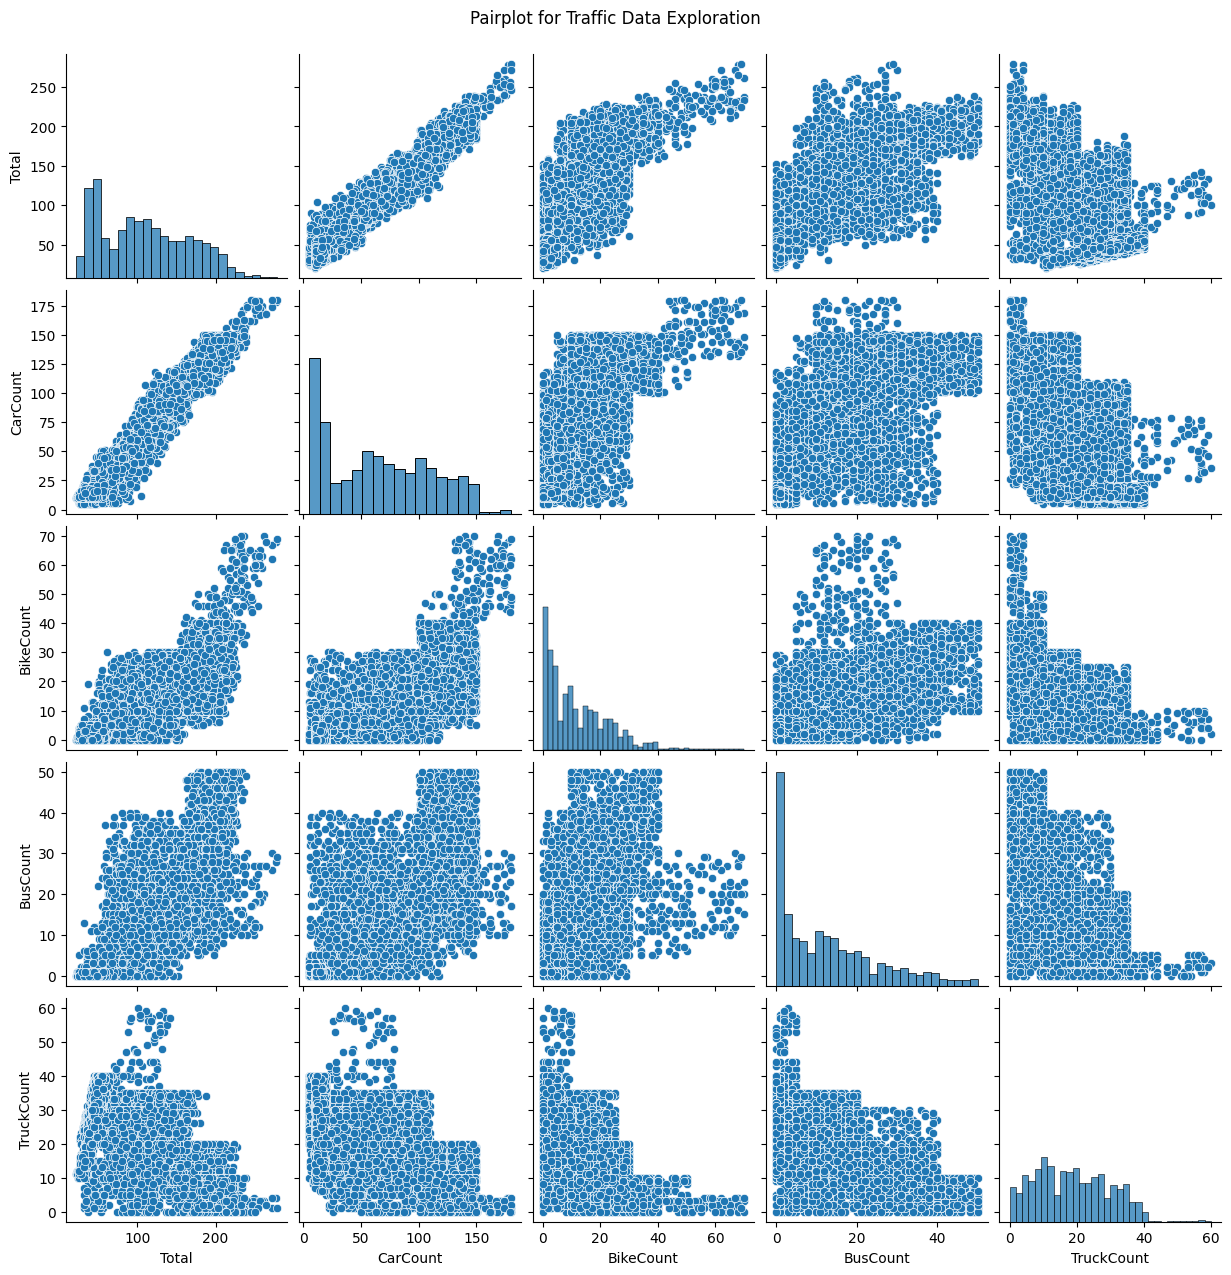

In [13]:
# Pairplot for traffic data exploration
sns.pairplot(data[['Total', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount']])
plt.suptitle('Pairplot for Traffic Data Exploration', y=1.02)
plt.show()